# **Présentation de notre projet**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [3]:
nombre_patient = 100
nombre_docteur = 30

In [4]:
def position (n):
    return (np.random.uniform(0,1,size = (n)), np.random.uniform(0,1,size = (n)))
    

In [5]:
position_docteur = position(nombre_docteur)
position_patient = position(nombre_patient)
position_docteur

(array([0.07987339, 0.25755337, 0.78701115, 0.80276382, 0.70930747,
        0.83442653, 0.13554165, 0.11771934, 0.34750791, 0.92877534,
        0.24205568, 0.73744896, 0.37883863, 0.79666256, 0.46944283,
        0.54218504, 0.74270264, 0.39597457, 0.76740275, 0.04709511,
        0.11557117, 0.79439148, 0.79767867, 0.84928717, 0.80920398,
        0.24258013, 0.17337148, 0.9404843 , 0.69167495, 0.05652104]),
 array([0.26630258, 0.08753405, 0.07837434, 0.48974496, 0.27969433,
        0.33510407, 0.30185195, 0.98837177, 0.36616891, 0.06671737,
        0.58989998, 0.11978517, 0.52348288, 0.42573915, 0.61812749,
        0.35770295, 0.29528355, 0.62157609, 0.88169867, 0.2393445 ,
        0.28422049, 0.24534391, 0.83776038, 0.72706639, 0.86520605,
        0.6657089 , 0.34683507, 0.58614478, 0.72780023, 0.53699951]))

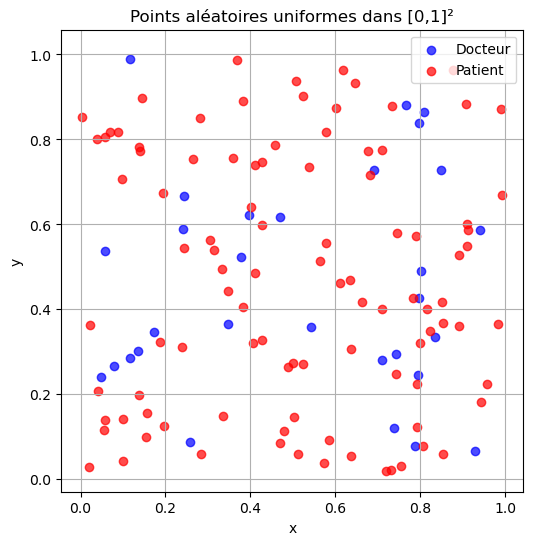

In [6]:
#On représente les points sur un graphe
plt.figure(figsize=(6, 6))
plt.scatter(position_docteur[0], position_docteur[1], color='blue', alpha=0.7, label="Docteur")
plt.scatter(position_patient[0], position_patient[1], color='red', alpha=0.7, label="Patient")
plt.title("Points aléatoires uniformes dans [0,1]²")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.axis('square')
plt.legend()
plt.show()

In [7]:
matrice_distance = np.zeros((nombre_patient, nombre_docteur))
for j in range(nombre_docteur):
    for i in range(nombre_patient):
        matrice_distance[i,j] = np.sqrt((position_patient[1][i]-position_docteur[1][j])**2+(position_patient[0][i]-position_docteur[0][j])**2)
matrice_distance

array([[0.13458197, 0.12144505, 0.63432925, ..., 0.89319013, 0.78223593,
        0.39380438],
       [0.57856765, 0.67090065, 0.76143217, ..., 0.55135839, 0.28076396,
        0.40896679],
       [0.86796891, 0.6924589 , 0.18734971, ..., 0.40500841, 0.60193174,
        0.9558434 ],
       ...,
       [1.09368099, 1.07351166, 0.8190411 , ..., 0.289918  , 0.33186547,
        0.992349  ],
       [0.54349388, 0.52517922, 0.49007528, ..., 0.38383302, 0.24892985,
        0.50738369],
       [0.53595988, 0.74575592, 1.03939474, ..., 0.92602011, 0.65606817,
        0.26429077]], shape=(100, 30))

In [8]:
#On calcule maintenant alpha_i et psi_j
alpha = np.random.randint(0,3,size=nombre_patient)/10
psi = np.random.randint(0,3,size=nombre_docteur)/10
alpha,psi

(array([0.2, 0. , 0. , 0.2, 0.2, 0.2, 0. , 0. , 0.2, 0. , 0. , 0.2, 0. ,
        0.2, 0.1, 0.1, 0.2, 0.2, 0. , 0.2, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2,
        0.2, 0.2, 0.1, 0. , 0.2, 0.1, 0.2, 0.1, 0. , 0. , 0.2, 0. , 0. ,
        0. , 0.2, 0.1, 0.2, 0.1, 0.2, 0.1, 0.1, 0.2, 0.1, 0.2, 0.1, 0. ,
        0.2, 0. , 0. , 0.2, 0. , 0. , 0.2, 0.1, 0.1, 0.1, 0.1, 0. , 0.2,
        0.2, 0. , 0.1, 0.1, 0.1, 0. , 0. , 0.1, 0.2, 0.1, 0. , 0.2, 0.1,
        0.2, 0. , 0.2, 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0.2, 0.1, 0. ,
        0.2, 0.2, 0. , 0.1, 0.1, 0.1, 0.2, 0.1, 0.2]),
 array([0. , 0.1, 0.2, 0. , 0.2, 0.2, 0.1, 0.2, 0.1, 0.2, 0.2, 0. , 0.1,
        0. , 0.2, 0.1, 0. , 0. , 0.1, 0. , 0. , 0.2, 0. , 0.2, 0. , 0.1,
        0. , 0. , 0. , 0.2]))

In [9]:
#On va maintenant générer Yij
lien = np.zeros((nombre_patient,nombre_docteur))
for j in range(nombre_docteur):
    for i in range(nombre_patient):
        lambda_ij =-3.5*matrice_distance[i,j]-alpha[i]+psi[j]
        lien[i,j] = np.random.binomial(1,1-(1/(1+np.exp(lambda_ij))))
        #lien[i,j] = 1 if 0.5-1*matrice_distance[i,j]-alpha[i]+psi[j]+np.random.normal(0,1)>0 else 0
        #lien[i,j] = 1 if 0.5-1*matrice_distance[i,j]-alpha[j]+psi[i]+np.random.normal(0,1)>0 else 0
        #lien[i,j] = np.random.binomial(1,1/(1+np.exp(0.5*matrice_distance[i,j]+alpha[j]-psi[i]+np.random.normal(0,1))))
lien

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.]], shape=(100, 30))

/tmp/ipykernel_49466/1930555695.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([position_docteur[0][j], position_patient[0][i]], [position_docteur[1][j], position_patient[1][i]], 'k-',alpha=0.5,color="green")


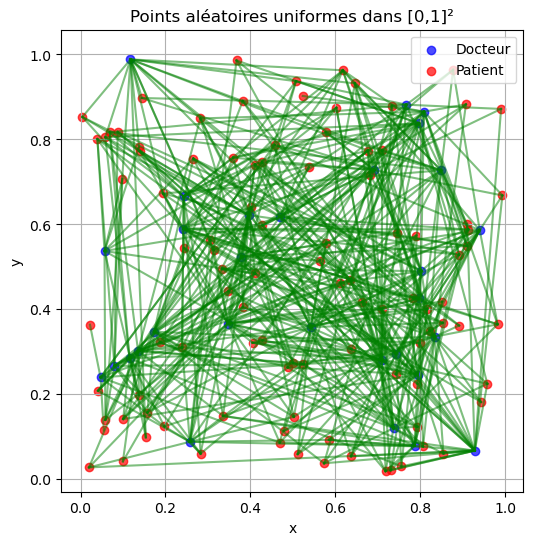

In [ ]:
#On représente les Yij sur un graphe
plt.figure(figsize=(6, 6))
plt.scatter(position_docteur[0], position_docteur[1], color='blue', alpha=0.7, label="Docteur")
plt.scatter(position_patient[0], position_patient[1], color='red', alpha=0.7, label="Patient")
for i in range(nombre_patient):
    for j in range(nombre_docteur):
        if lien[i,j] == 1:
            plt.plot([position_docteur[0][j], position_patient[0][i]], [position_docteur[1][j], position_patient[1][i]], 'k-',alpha=0.5,color="green")
plt.title("Points aléatoires uniformes dans [0,1]²")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.axis('square')
plt.legend()
plt.show()

In [11]:
#On va maintenant faire la regression de Yij sur Xij, alpha_i et psi_j
model = LogisticRegression()
model.fit(matrice_distance.reshape(-1,1),lien.reshape(-1,1))
y_pred = model.predict(lien.reshape(-1,1))

/opt/conda/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
x = sm.add_constant(matrice_distance.reshape(-1,1))
model = sm.Probit(lien.reshape(-1,1), x)
result = model.fit()
print(result.summary())
proba= result.predict(x)
print(proba)
y_pred = (proba >= 0.5).astype(int)
y_pred

Optimization terminated successfully.
         Current function value: 0.426949
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3000
Model:                         Probit   Df Residuals:                     2998
Method:                           MLE   Df Model:                            1
Date:                Sun, 20 Apr 2025   Pseudo R-squ.:                 0.09428
Time:                        23:10:48   Log-Likelihood:                -1280.8
converged:                       True   LL-Null:                       -1414.2
Covariance Type:            nonrobust   LLR p-value:                 6.049e-60
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0105      0.062     -0.170      0.865      -0.132       0.111
x1            -1.9551      0.

array([0, 0, 0, ..., 0, 0, 0], shape=(3000,))

In [13]:
#On regarde la distance entre la prédiction et la réalité
mse = mean_squared_error(lien.reshape(-1,1), y_pred)
mse

0.18

In [14]:
alpha_sante = -np.random.randint(0,3,size=nombre_patient)
psi_sante = np.random.randint(0,3,size=nombre_docteur)
psi_sante[len(psi_sante)-1]=0
alpha_sante,psi_sante

(array([-2,  0,  0,  0, -2,  0, -1,  0, -1, -2, -1,  0,  0,  0, -2, -1, -1,
        -1,  0, -1, -2, -2, -2, -1,  0, -2, -1,  0,  0, -1, -2, -1, -2, -1,
        -2,  0,  0,  0, -1, -1, -1, -1, -1,  0, -2, -2, -1, -1, -1, -2, -2,
         0, -2,  0, -2, -1,  0, -1, -2, -2, -2, -1,  0,  0, -1,  0, -2, -2,
        -2, -2, -1,  0,  0,  0, -1, -2,  0, -2, -2, -2, -2, -2,  0,  0, -2,
         0, -2,  0,  0, -2,  0, -1, -2,  0,  0, -1, -1, -1, -2,  0]),
 array([1, 0, 2, 2, 0, 1, 2, 0, 1, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2,
        1, 1, 2, 0, 0, 0, 1, 0]))

In [15]:
prix = np.zeros((nombre_patient,nombre_docteur))
for j in range(nombre_docteur):
    for i in range(nombre_patient):
        prix[i,j] = 4 + alpha_sante[i] + psi_sante[j] + 3*matrice_distance[i,j]

In [16]:
patient_ids = np.repeat(np.arange(nombre_patient), nombre_docteur)
doctor_ids = np.tile(np.arange(nombre_docteur), nombre_patient)

df = pd.DataFrame({
    'patient_id': patient_ids,
    'doctor_id': doctor_ids,
    'distance': matrice_distance.flatten(),
    'link': lien.flatten(),
    'prix': prix.flatten()
})
df

,patient_id,doctor_id,distance,link,prix
0,0,0,0.134582,1.0,3.403746
1,0,1,0.121445,0.0,2.364335
2,0,2,0.634329,0.0,5.902988
3,0,3,0.726305,0.0,6.178914
4,0,4,0.565429,0.0,3.696286
...,...,...,...,...,...
2995,99,25,0.243736,0.0,4.731208
2996,99,26,0.473198,0.0,5.419593
2997,99,27,0.926020,0.0,6.778060
2998,99,28,0.656068,0.0,6.968205


### **On génère Y = DY\* **

In [17]:
y = np.zeros((nombre_patient, nombre_docteur))

for i in range(nombre_patient):
    for j in range(nombre_docteur):
        y[i,j] = prix[i,j]*lien[i,j]
y

array([[3.40374592, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        5.22690038],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 4.9955964 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [6.60787964, 0.        , 0.        , ..., 0.        , 0.        ,
        4.79287232]], shape=(100, 30))

In [18]:
X_tild = np.zeros((nombre_patient*nombre_docteur,2))
for i in range(nombre_patient):
    for j in range(nombre_docteur):
        X_tild[i*nombre_docteur+j][0]=1
        X_tild[i*nombre_docteur+j][1]=matrice_distance[i,j]

X_tild

array([[1.        , 0.13458197],
       [1.        , 0.12144505],
       [1.        , 0.63432925],
       ...,
       [1.        , 0.92602011],
       [1.        , 0.65606817],
       [1.        , 0.26429077]], shape=(3000, 2))

In [19]:
A_tild = np.zeros((nombre_patient*nombre_docteur,nombre_patient))
for i in range(nombre_patient*nombre_docteur):
        n = i//nombre_docteur
        A_tild[i][n]=1

print(A_tild)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [20]:
B_tild = np.zeros((nombre_patient*nombre_docteur,nombre_docteur))
for i in range(nombre_patient*nombre_docteur):
        n = i%nombre_docteur
        if n<nombre_docteur:
                B_tild[i][n]=1
print(B_tild)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [21]:
Y_etoile = np.zeros((nombre_patient*nombre_docteur,1))

for j in range(nombre_docteur):
    for i in range(nombre_patient):
        Y_etoile[i*nombre_docteur+j][0] = prix[i,j]
Y_etoile

array([[3.40374592],
       [2.36433515],
       [5.90298775],
       ...,
       [6.77806032],
       [6.96820452],
       [4.79287232]], shape=(3000, 1))

In [22]:
S = np.zeros((int(lien.sum()),nombre_patient*nombre_docteur))
l=0
while l<int(lien.sum()):
    for i in range(nombre_patient):
        for j in range(nombre_docteur):
            if lien[i,j] == 1:
                S[l][i*nombre_docteur+j] = 1
                l+=1

S

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], shape=(540, 3000))

In [23]:
A = S@A_tild
B = S@B_tild
B = B[:,:-1]
X = S@X_tild
Y = S@Y_etoile

In [24]:
G = np.hstack([A, B])

In [25]:
C = np.eye(int(lien.sum()))-G@G.T

In [26]:
Beta_chapeau = np.linalg.inv(X.T@C@X)@X.T@C@Y
Beta_chapeau

array([[4.18431842],
       [2.76894348]])

In [27]:
Effets_fixes = (np.linalg.pinv(G.T@G))@(G.T@(Y-X@Beta_chapeau))

In [28]:
alpha_chapeau = Effets_fixes[:nombre_patient][:,0]
(10*alpha_chapeau).round()/10


array([-2.1, -0.1, -0.1, -0.1, -2.1, -0.1, -1.1, -0.1, -1.1, -2.1, -1.1,
       -0.1, -0.1, -0.1, -2.2, -1.1, -1.1, -1.1, -0.1, -1.1, -2.1, -2.1,
       -2.1, -1.1, -0.1, -2.1, -1.1, -0.1, -0.1, -1.1, -2.1, -1.1, -2.1,
       -1.1, -2.1, -0.2, -0.1, -0.1, -1.1, -1.1, -1.1, -1.1, -1.1, -0.1,
       -2.1, -2.1, -1.1, -1.1, -1.1, -2. , -2.1, -0.1, -2.1, -0.1, -2.1,
       -1.1, -0.1, -1.1, -2.1, -2.1, -2.1, -1.1, -0.1, -0.1, -1.1, -0.1,
       -2.1, -2.1, -2.1, -2.1, -1.1, -0.1, -0.1, -0.1, -1.1, -2. , -0.1,
       -2.1, -2.1, -2.1, -2.2, -2.1, -0.1, -0.1, -2.2, -0.1, -2.1, -0.1,
       -0.2, -2.1, -0.1, -1.2, -2.1, -0.1, -0.1, -1.1, -1.1, -1.1, -2.1,
       -0.1])

In [29]:
psi_chapeau = Effets_fixes[nombre_patient:]
psi_chapeau = np.vstack([psi_chapeau,[[0]]])[:,0]
(10*psi_chapeau).round()/10


array([ 1.,  0.,  2.,  2., -0.,  1.,  2.,  0.,  1.,  2.,  0.,  0.,  2.,
        2.,  0.,  2.,  2.,  2.,  2.,  1.,  2.,  2.,  1.,  1.,  2., -0.,
        0.,  0.,  1.,  0.])

In [30]:
prix_chapeau = np.zeros((nombre_patient,nombre_docteur))
for j in range(nombre_docteur):
    for i in range(nombre_patient):
        prix_chapeau[i,j] = Beta_chapeau[0] + alpha_chapeau[i] + psi_chapeau[j] + Beta_chapeau[1]*matrice_distance[i,j]
prix_chapeau

/tmp/ipykernel_49466/930487030.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prix_chapeau[i,j] = Beta_chapeau[0] + alpha_chapeau[i] + psi_chapeau[j] + Beta_chapeau[1]*matrice_distance[i,j]


array([[3.47038553, 2.44605376, 5.8723457 , ..., 4.58160161, 5.26837002,
        3.19232113],
       [6.67466271, 5.9423712 , 8.19919243, ..., 5.60999479, 5.85472843,
        5.20921094],
       [7.51958793, 6.04565424, 6.65318004, ..., 5.24834943, 6.78761332,
        6.76707084],
       ...,
       [7.10618871, 6.06238459, 7.36391456, ..., 3.89128738, 5.00143187,
        5.82976956],
       [4.58134299, 3.54267437, 5.45161811, ..., 3.14992408, 3.77037915,
        3.48551932],
       [6.60047188, 6.19342888, 9.01264277, ..., 6.69119958, 6.93771226,
        4.85239889]], shape=(100, 30))

In [31]:
int(((prix-prix_chapeau)**2).sum())/(nombre_patient*nombre_docteur)

0.004666666666666667

In [32]:
((alpha_sante-alpha_chapeau[:])**2).sum()/(nombre_patient)

np.float64(0.012737166262373834)

In [33]:
(np.abs(psi_sante-psi_chapeau[:])).sum()/(nombre_docteur)

np.float64(0.011522091188769058)

In [34]:
alpha_sante-alpha_chapeau

array([0.08241935, 0.10751342, 0.06392394, 0.08030915, 0.11734382,
       0.1034663 , 0.10868119, 0.13499076, 0.09909963, 0.12304707,
       0.08366959, 0.11251055, 0.11243145, 0.12072353, 0.17529614,
       0.11911835, 0.11355899, 0.09809544, 0.12145218, 0.13807441,
       0.09952023, 0.12505822, 0.13471032, 0.09740264, 0.08949466,
       0.09408354, 0.12435889, 0.08440879, 0.06244408, 0.11180177,
       0.0610842 , 0.12735742, 0.12814494, 0.11110209, 0.10941552,
       0.15135779, 0.11428015, 0.07096254, 0.13033676, 0.11055145,
       0.10485083, 0.07939558, 0.1003659 , 0.08977553, 0.12590705,
       0.10564844, 0.09722862, 0.11516538, 0.10015376, 0.04430249,
       0.09263681, 0.11425686, 0.11228459, 0.12739504, 0.12636888,
       0.10615195, 0.10874818, 0.11360766, 0.08087169, 0.13902275,
       0.13325791, 0.13409681, 0.09503466, 0.08878903, 0.09974886,
       0.11272644, 0.08465454, 0.14931283, 0.12763776, 0.1036292 ,
       0.10830295, 0.12944497, 0.11551069, 0.09673185, 0.11566